This is multiplication $\mathfrak{C^*}$ circuit in $F_{2^8}$ in Figure 8. The current operation of the circuit is $(x^7+x^3+x^2+1) \cdot (x^6+x^5+1) \oplus (x^7+x^6+x^5+x^3+x+1)=x^7+x^6+x^5+x^4+x^3+1$.

In [1]:
import numpy as np
from qiskit import *
from qiskit_aer import Aer
q1=QuantumRegister(4,'a0')
q2=QuantumRegister(4,'a1')
q3=QuantumRegister(4,'b0')
q4=QuantumRegister(4,'b1')
q5=QuantumRegister(4,'d0')
q6=QuantumRegister(4,'d1')

c1 = ClassicalRegister(4)
c2 = ClassicalRegister(4)


In [2]:
# Circuit of isomorphic mapping t^{-1}
qc=QuantumCircuit(q1,q2)
def t_inv(q1,q2):
    qc.cx(q2[3],q1[2])
    qc.cx(q1[1],q2[0])
    qc.cx(q1[3],q1[1])
    qc.cx(q2[1],q1[3])
    qc.cx(q1[2],q2[1])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[1],q2[2])
    qc.cx(q1[3],q2[3])
    qc.cx(q2[3],q2[0])
    qc.cx(q2[0],q1[2])

    qc.swap(q2[1],q2[3])
    qc.swap(q1[1],q2[0])
    qc.swap(q1[1],q1[3])


In [3]:
# Reverse order circuit of isomorphic mapping t^{-1}
qc=QuantumCircuit(q1,q2)
def t_inv_r(q1,q2):
    qc.swap(q1[1],q1[3])
    qc.swap(q1[1],q2[0])
    qc.swap(q2[1],q2[3])

    qc.cx(q2[0],q1[2])
    qc.cx(q2[3],q2[0])
    qc.cx(q1[3],q2[3])
    qc.cx(q1[1],q2[2])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[2],q2[1])
    qc.cx(q2[1],q1[3])
    qc.cx(q1[3],q1[1])
    qc.cx(q1[1],q2[0])
    qc.cx(q2[3],q1[2])

In [4]:
# multiplication C* circuit in F2^4
qc=QuantumCircuit(q1,q2,q3)
def mul_h(q1,q2,q3):

    qc.cx(q3[3],q3[2])
    qc.cx(q3[1],q3[3])
    qc.cx(q3[3],q3[0])
    qc.cx(q3[0],q3[1])

    qc.cx(q1[1],q1[0])
    qc.cx(q2[1],q2[0])
    qc.cx(q1[0],q1[3])
    qc.cx(q2[0],q2[3])
    qc.ccx(q1[0],q2[0],q3[3])
    qc.ccx(q1[1],q2[1],q3[1])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.cx(q1[3],q1[0])
    qc.cx(q2[3],q2[0])
    qc.cx(q1[1],q1[3])
    qc.cx(q2[1],q2[3])
    qc.cx(q3[0],q3[2])
    qc.cx(q3[1],q3[0])
    qc.cx(q3[3],q3[1])
    qc.cx(q3[2],q3[3])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[1],q3[2])
    qc.ccx(q1[0],q2[0],q3[0])
    qc.ccx(q1[3],q2[3],q3[2])
    qc.cx(q1[3],q1[0])
    qc.cx(q2[3],q2[0])
    qc.cx(q1[2],q1[0])
    qc.cx(q2[2],q2[0])
    qc.cx(q1[2],q1[1])
    qc.cx(q2[2],q2[1])
    qc.cx(q1[0],q1[3])
    qc.cx(q2[0],q2[3])
    qc.cx(q3[0],q3[3])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[0],q3[1])
    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[3])
    qc.ccx(q1[2],q2[2],q3[1])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.cx(q1[2],q1[0])
    qc.cx(q2[2],q2[0])
    qc.cx(q1[2],q1[1])
    qc.cx(q2[2],q2[1])
    qc.cx(q1[2],q1[3])
    qc.cx(q2[2],q2[3])

In [5]:
# Constant multiplication
qc=QuantumCircuit(q1)
def constant(q1):
    qc.cx(q1[3],q1[0])
    qc.cx(q1[3],q1[2])
    qc.cx(q1[3],q1[1])
    qc.swap(q1[0],q1[1])
    qc.swap(q1[0],q1[2])
    qc.swap(q1[0],q1[3])
    

In [6]:
# Reverse order circuit of constant multiplication
qc=QuantumCircuit(q1)
def constant_r(q1):
    qc.swap(q1[0],q1[3])
    qc.swap(q1[0],q1[2])
    qc.swap(q1[0],q1[1])
    qc.cx(q1[3],q1[1])
    qc.cx(q1[3],q1[2])
    qc.cx(q1[3],q1[0])
    
    

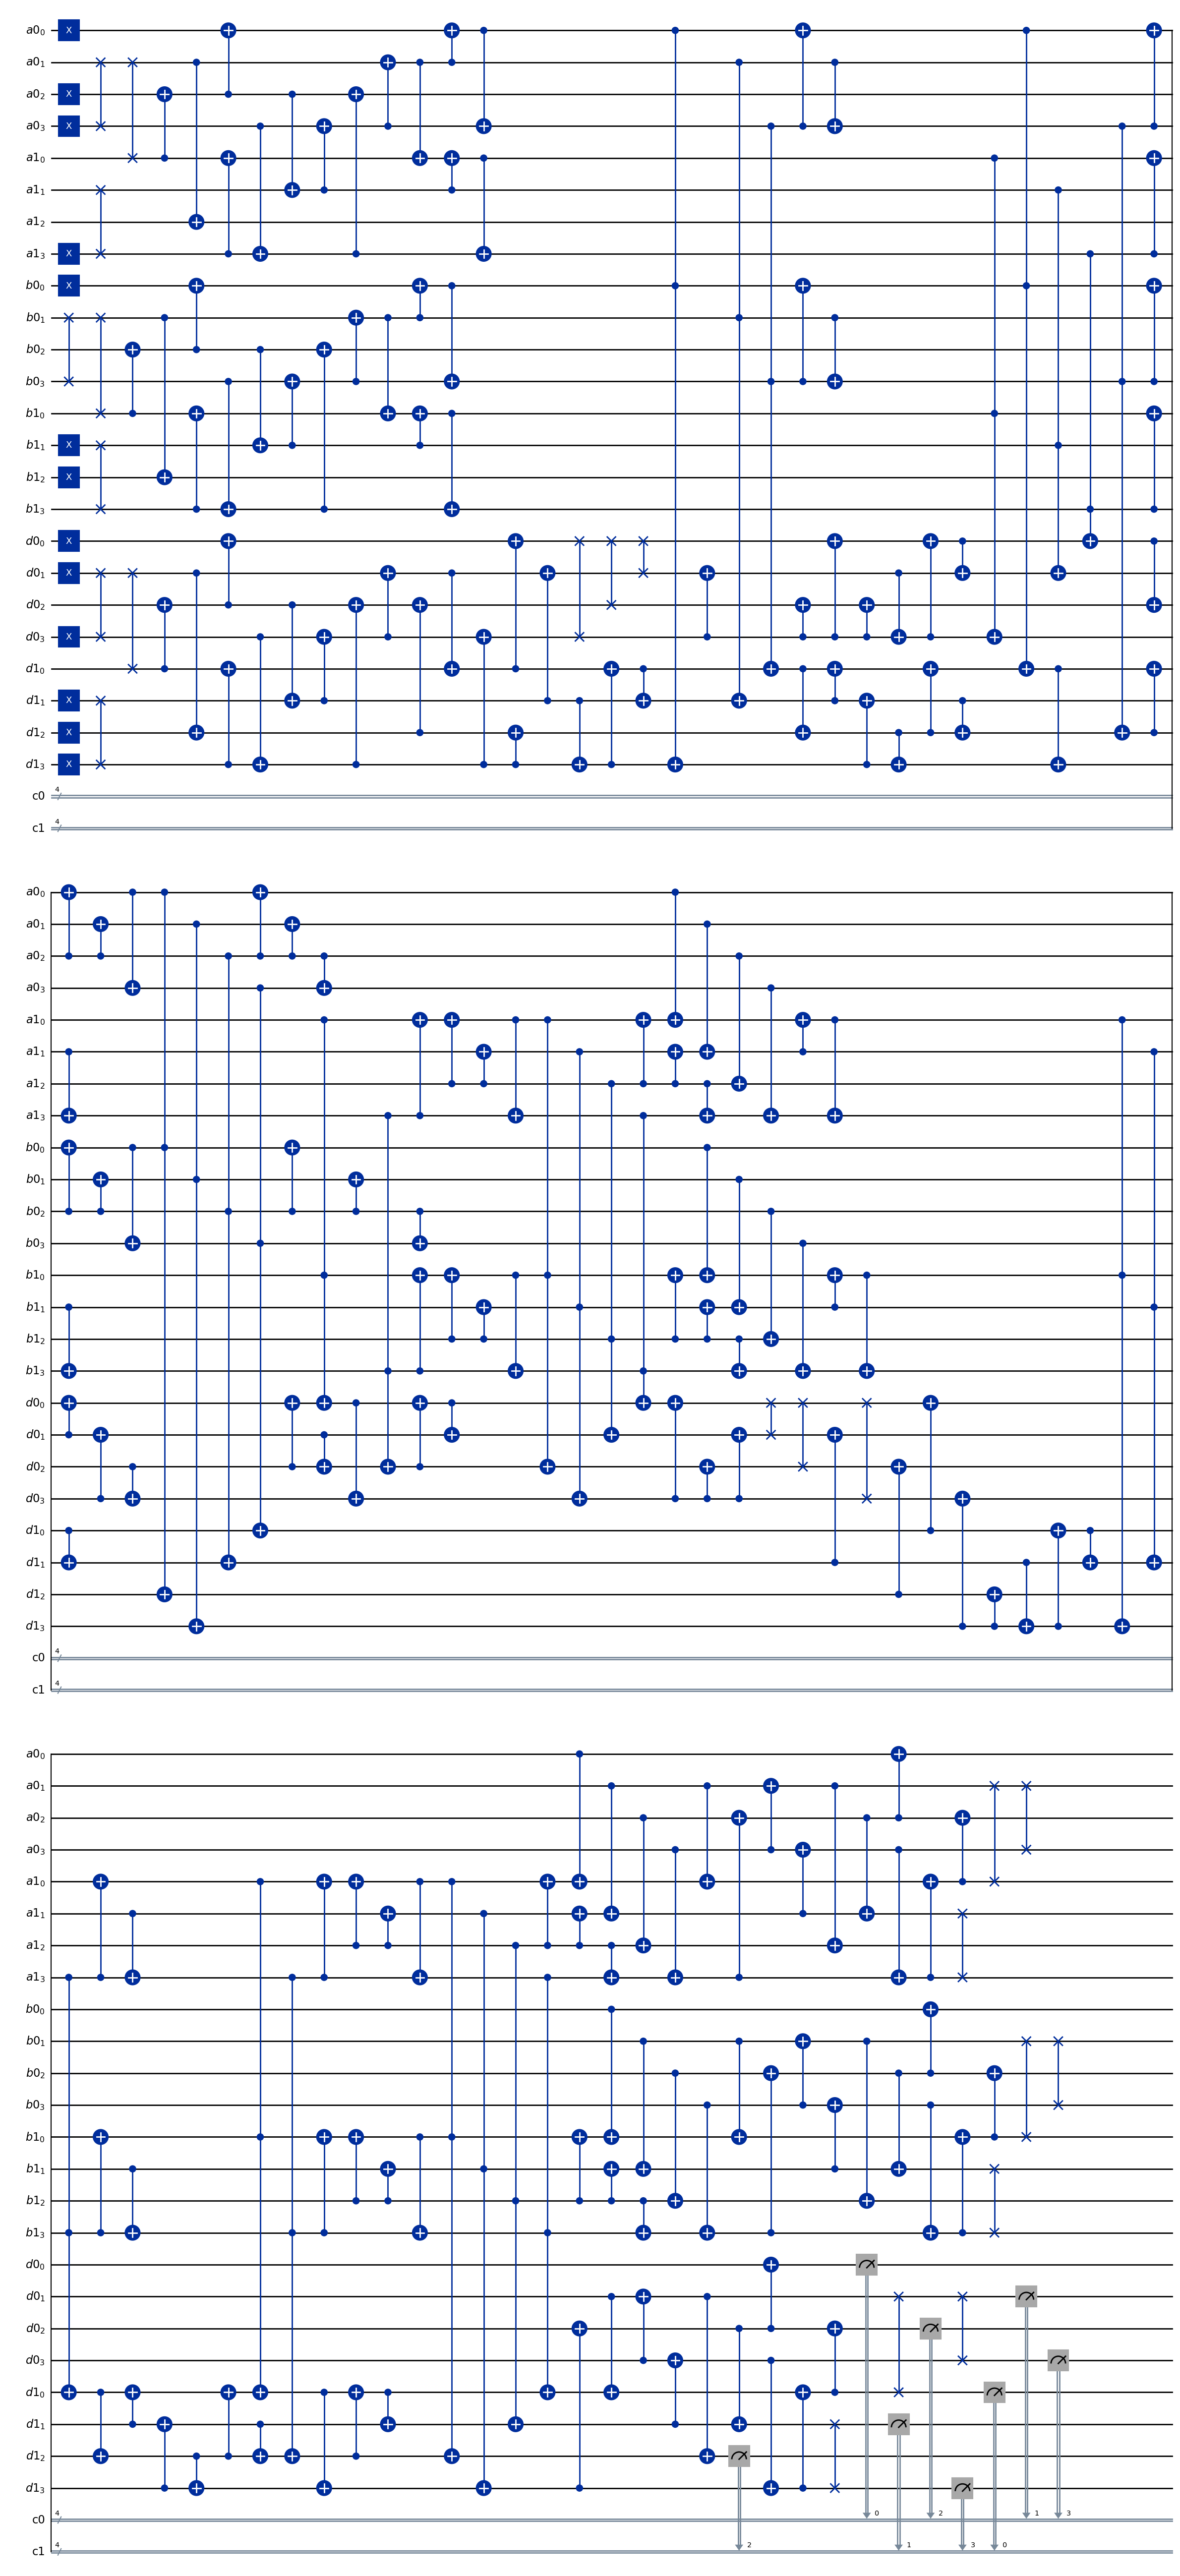

In [7]:
qc=QuantumCircuit(q1,q2,q3,q4,q5,q6,c1,c2)

qc.x(q1[0])
#qc.x(q1[1])
qc.x(q1[2])
qc.x(q1[3])
#qc.x(q2[0])
#qc.x(q2[1])
#qc.x(q2[2])
qc.x(q2[3])

qc.x(q3[0])
#qc.x(q3[1])
#qc.x(q3[2])
#qc.x(q3[3])
#qc.x(q4[0])
qc.x(q4[1])
qc.x(q4[2])
#qc.x(q4[3])

qc.x(q5[0])
qc.x(q5[1])
#qc.x(q5[2])
qc.x(q5[3])
#qc.x(q6[0])
qc.x(q6[1])
qc.x(q6[2])
qc.x(q6[3])


t_inv_r(q1,q2)
t_inv_r(q3,q4)
t_inv_r(q5,q6)

for i in range(4):
    qc.cx(q6[i],q5[i])

constant_r(q5)
mul_h(q2,q4,q5)
mul_h(q1,q3,q6)
constant(q5)

for i in range(4):
    qc.cx(q1[i],q2[i])
    
for i in range(4):
    qc.cx(q3[i],q4[i])  
    
for i in range(4):
    qc.cx(q6[i],q5[i])

mul_h(q2,q4,q6)

for i in range(4):
    qc.cx(q1[i],q2[i])
    
for i in range(4):
    qc.cx(q3[i],q4[i]) 


t_inv(q1,q2)
t_inv(q3,q4)
t_inv(q5,q6)

qc.measure(q5,c1)
qc.measure(q6,c2)

qc.draw('mpl',fold=35)

In [8]:
from qiskit_aer import Aer
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['1111 1001', '1111 1001', '1111 1001', '1111 1001', '1111 1001', '1111 1001', '1111 1001', '1111 1001', '1111 1001', '1111 1001']


In [9]:
print(qc.count_ops())

OrderedDict([('cx', 195), ('ccx', 27), ('swap', 24), ('x', 13), ('measure', 8)])
